In [2]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
from datetime import datetime

SENSOR = pd.read_csv(r"P:\2022\Sensores CO2 & Data loggers a bateria\Sensores_py\NOVUS_16_mar.csv") #endereco do arquivo

#b'Sensor,CO2(ppm),Temperatura (C),umidade (%),Data\r\n',16/3/2022 09:16:35


#aplicando funcoes que deixam o formato do texto mais funcional
SENSOR["b'Sensor"] = SENSOR["b'Sensor"].apply(lambda x: x.replace("'","").replace("b","").replace(r"\r\n","").strip())
SENSOR["TVOC"] = SENSOR["TVOC"].apply(lambda x: x.replace("'","").replace("b","").replace(r"\r\n","").strip())
SENSOR = SENSOR.rename(columns={r"Data\r\n'": "Data"})

SENSOR = SENSOR.rename(columns={"b'Sensor": "Sensor"})
SENSOR = SENSOR.rename(columns={"TVOC": "TVOC(ppb)"})

#separando cada sensor em um data frame diferente para manipular mais tarde
SCD30_df= SENSOR['Sensor']=='SCD30';  SCD30 = SENSOR[SCD30_df]
SGP30_df= SENSOR['Sensor']=='SGP30';  SGP30 = SENSOR[SGP30_df]
CCS811_df= SENSOR['Sensor']=='CCS811';  CCS811 = SENSOR[CCS811_df]
PASCO2_df= SENSOR['Sensor']=='PASCO2';  PASCO2 = SENSOR[PASCO2_df]
SCD41_df= SENSOR['Sensor']=='SCD41';  SCD41 = SENSOR[SCD41_df]

#fazendo conversoes de str - float e str - datetime
SCD30['umidade (%)'] = pd.to_numeric(SCD30['umidade (%)'])
SCD30['Temperatura (C)'] = pd.to_numeric(SCD30['Temperatura (C)'])
SCD30['Data'] = pd.to_datetime(SCD30['Data'])

SCD41['umidade (%)'] = pd.to_numeric(SCD41['umidade (%)'])
SCD41['Temperatura (C)'] = pd.to_numeric(SCD41['Temperatura (C)'])
SCD41['Data'] = pd.to_datetime(SCD41['Data'])

PASCO2['Data'] = pd.to_datetime(PASCO2['Data'])

CCS811['Data'] = pd.to_datetime(CCS811['Data'])
CCS811['TVOC(ppb)'] = pd.to_numeric(CCS811['TVOC(ppb)'])

SGP30['Data'] = pd.to_datetime(SGP30['Data'])
SGP30['TVOC(ppb)'] = pd.to_numeric(SGP30['TVOC(ppb)'])



C:\Users\lwmachado\AppData\Local\Temp\ipykernel_12048\763299623.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SCD30['umidade (%)'] = pd.to_numeric(SCD30['umidade (%)'])
C:\Users\lwmachado\AppData\Local\Temp\ipykernel_12048\763299623.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SCD30['Temperatura (C)'] = pd.to_numeric(SCD30['Temperatura (C)'])
C:\Users\lwmachado\AppData\Local\Temp\ipykernel_12048\763299623.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

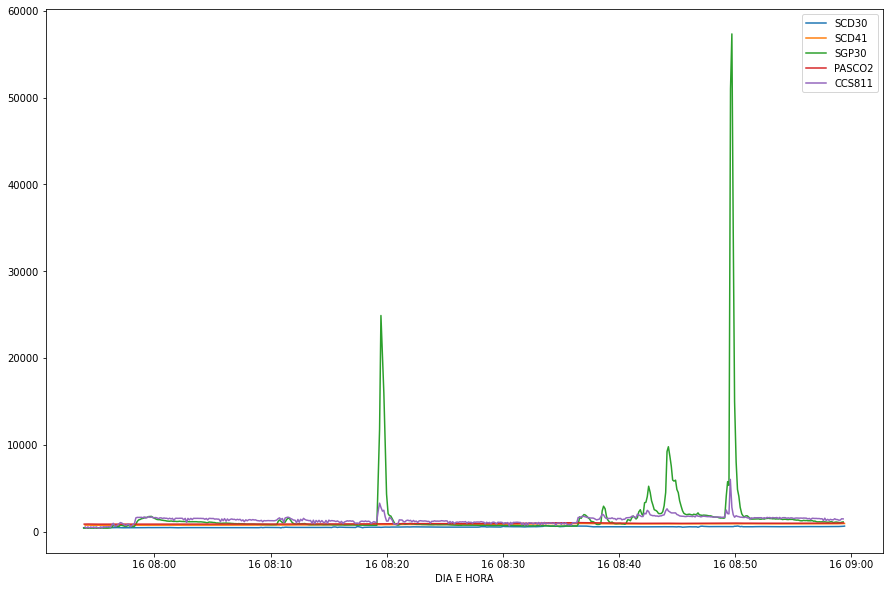

In [3]:
#plotando graficos comparacao
plt.figure(figsize=(15, 10))
plt.plot(SCD30['Data'],SCD30['CO2(ppm)'], label = 'SCD30')
plt.plot(SCD41['Data'],SCD41['CO2(ppm)'], label = 'SCD41')
plt.plot(SGP30['Data'],SGP30['CO2(ppm)'],label= 'SGP30')
plt.plot(PASCO2['Data'], PASCO2['CO2(ppm)'], label = 'PASCO2')
plt.plot(CCS811['Data'], CCS811['CO2(ppm)'], label = 'CCS811')
plt.xlabel("DIA E HORA")
plt.plot()
plt.legend()


[]

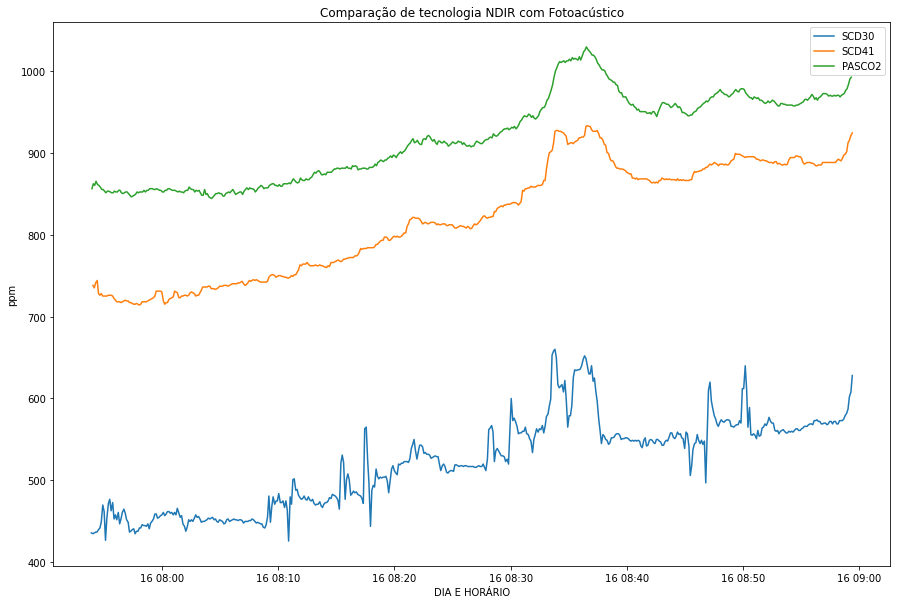

In [4]:
#COMPARACAO SENSORES NDIR

plt.figure(figsize=(15,10))
plt.plot(SCD30['Data'], SCD30['CO2(ppm)'], label = 'SCD30')
plt.plot(SCD41['Data'], SCD41['CO2(ppm)'], label = 'SCD41')
plt.plot(PASCO2['Data'], PASCO2['CO2(ppm)'], label = 'PASCO2')
plt.xlabel('DIA E HORÁRIO')
plt.ylabel('ppm')
plt.title('Comparação de tecnologia NDIR com Fotoacústico')
plt.legend()
plt.plot()

[]

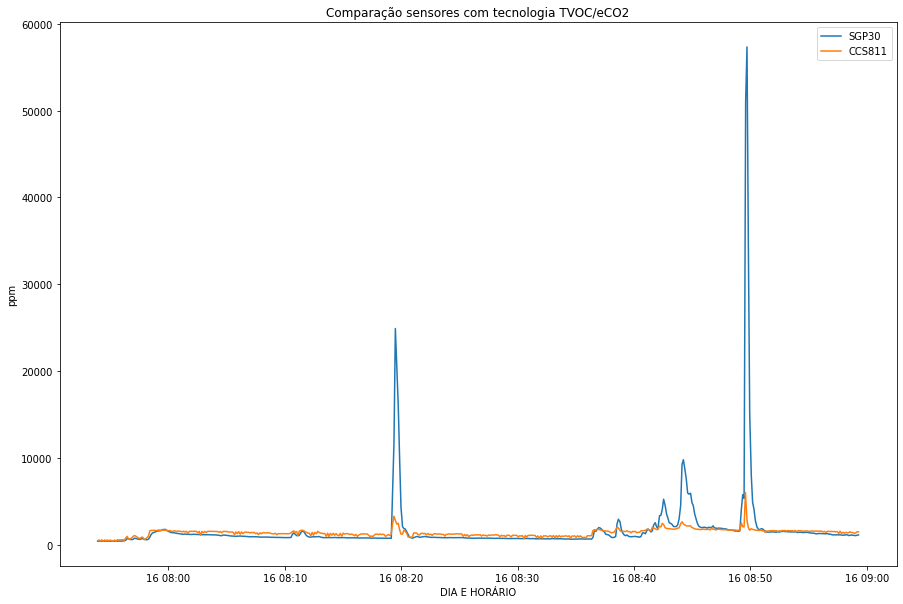

In [5]:
#COMPARACAO SENSORES TVOC
plt.figure(figsize=(15,10))
plt.plot(SGP30['Data'], SGP30['CO2(ppm)'], label = 'SGP30')
plt.plot(CCS811['Data'], CCS811['CO2(ppm)'], label = 'CCS811')
plt.xlabel('DIA E HORÁRIO')
plt.ylabel('ppm')
plt.title('Comparação sensores com tecnologia TVOC/eCO2')
plt.legend()
plt.plot()